## Observations and Insights

Looking at the Scatter Plot for Mouse Weight vs Average Tumor Volume for the Capomulin regimen, we can see that there is most likely a positive correlation between the two factors. After calculating the Pearson correlation coefficient, we get a value of .95, which indicates there is, in fact, a very strong positive correlation between the two. A heavier mouse will have a larger average tumor volume, with respect to the Capomulin regimen data. 

If we take a look at the Line Plot that shows the change in Tumor Volume over the 45 day time period for the Mouse with ID s185 that was treated with Capomulin, we can see that this mouse's tumor reduced in volume by about 50% over the course of the 45 days. This is pretty remarkable data, but we could better judge the effectiveness of the Capomulin treatment if all of the mice that were given Capomulin were included in the graph. 

Observing the boxplots that represent Final Tumor Volume data for the treatments Capomulin, Ramicane, Infubinol, and Ceftamin, we don't see any significant outliers that could be skewing the data. We can see that the final tumor volume data points for Capomulin and Ramicane fall somewhere between 22 and 47 mm3, while the final tumor volume data points for Infubinol and Ceftamin fall roughly between 60 and 72 mm3. Since each mouse started with a tumor volume of 45mm3, we can see that a large majority of the tumors in mice treated with Capomulin and Ramicane reduced over the 45 day time period, while the tumors in mice treated with Infubinol and Ceftamin continued to grow. 

## Dependencies and starter code

In [144]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Read in data files
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/Study_results.csv")

# Combine the data into a single dataset
mouse_treatment_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_treatment_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [145]:
# Group data by Drug Regimen and find Mean, Median, Variance, Standard Deviation, and SEM

grouped_by_drug = mouse_treatment_data.groupby(["Drug Regimen"])
#display(grouped_by_drug.mean())
#display(grouped_by_drug.median())
#display(grouped_by_drug.var())
#display(grouped_by_drug.std())
#display(grouped_by_drug.sem())

In [146]:
# Save each dataframe to a variable and drop all columns besides Drug Regimen and Tumor Volume

mean_tumor_volume = grouped_by_drug.mean().drop(columns=["Age_months","Weight (g)", "Timepoint","Metastatic Sites"]).rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})
#display(mean_tumor_volume)
median_tumor_volume = grouped_by_drug.median().drop(columns=["Age_months","Weight (g)", "Timepoint","Metastatic Sites"]).rename(columns={"Tumor Volume (mm3)": "Median Tumor Volume"})
#display(median_tumor_volume)
var_tumor_volume = grouped_by_drug.var().drop(columns=["Age_months","Weight (g)", "Timepoint","Metastatic Sites"]).rename(columns={"Tumor Volume (mm3)": "Tumor Volume Variance"})
#display(var_tumor_volume)
std_tumor_volume = grouped_by_drug.std().drop(columns=["Age_months","Weight (g)", "Timepoint","Metastatic Sites"]).rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std Deviation"})
#display(std_tumor_volume)
sem_tumor_volume = grouped_by_drug.sem().drop(columns=["Mouse ID","Sex","Age_months","Weight (g)", "Timepoint","Metastatic Sites"]).rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std Error"})
#display(sem_tumor_volume)


In [147]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

tumor_vol_summary_data = mean_tumor_volume
tumor_vol_summary_data["Median Tumor Volume"] = median_tumor_volume["Median Tumor Volume"]
tumor_vol_summary_data["Tumor Volume Variance"]= var_tumor_volume["Tumor Volume Variance"]
tumor_vol_summary_data["Tumor Volume Std Deviation"]= std_tumor_volume["Tumor Volume Std Deviation"]
tumor_vol_summary_data["Tumor Volume Std Error"]= sem_tumor_volume["Tumor Volume Std Error"]
tumor_vol_summary_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Deviation,Tumor Volume Std Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [148]:
# Reset index for slightly cleaner aethestic 

tumor_vol_summary_data = tumor_vol_summary_data.reset_index()
tumor_vol_summary_data

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Deviation,Tumor Volume Std Error
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar plots

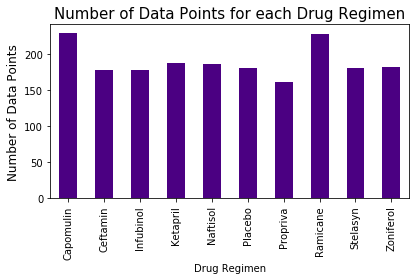

In [102]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Group data by Drug Regimen and use .count to find number of data points for each
grouped_by_drug = mouse_treatment_data.groupby(["Drug Regimen"])
drug_data_pts = grouped_by_drug["Drug Regimen"].count()
#print(drug_data_pts)

# Use pandas to chart data, set y axis label and title
drug_data_bar_plot = drug_data_pts.plot(kind="bar", color="indigo")
drug_data_bar_plot.set_ylabel("Number of Data Points", fontsize=12)
drug_data_bar_plot.set_title("Number of Data Points for each Drug Regimen", fontsize=15)
plt.tight_layout()
plt.show()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64


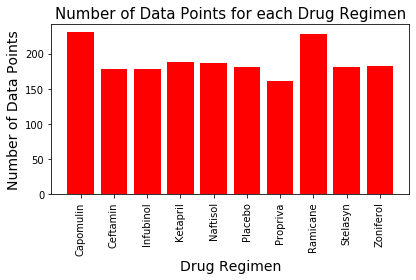

In [70]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Print out count of data points for each drug using data grouped by drug regimen
drug_data_pts = grouped_by_drug["Drug Regimen"].count()
print(drug_data_pts)

# Make list of drugs to be used for tick labels, and list of data points for y axis values
drugs = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane",
         "Stelasyn", "Zoniferol"]
drug_data_pts = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

#Set x axis and chart
x_axis= np.arange(len(drugs))
drug_data_chart = plt.bar(x_axis, drug_data_pts, color="r", align="center")

#Add tick locations and labels, set title and x and y axis labels
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation=90)

plt.title("Number of Data Points for each Drug Regimen", fontsize=15)
plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("Number of Data Points", fontsize=14)

plt.tight_layout()
plt.show()

## Pie plots

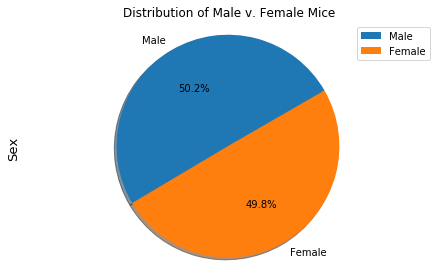

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Drop duplicate rows w regard to Mouse ID to avoid double counting mice
mouse_data_reduced = mouse_treatment_data.drop_duplicates(subset = "Mouse ID", keep="first")
#display(mouse_data_reduced)

# Get value counts of sex to find out distribution of male v female mice
gender_data = mouse_data_reduced["Sex"].value_counts()
#print(gender_data)

# Use pandas to create pie plot of the gender distribution, set y label and axis, include legend
gender_pie = gender_data.plot(kind="pie", title="Distribution of Male v. Female Mice", autopct="%1.1f%%", shadow=True,
                              startangle=30)
gender_pie.set_ylabel("Sex", fontsize=13)
plt.legend(loc="best")
plt.tight_layout()
plt.axis("equal")
plt.show()

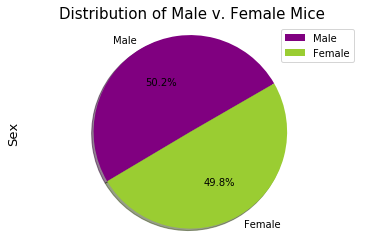

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Print value counts of gender data to get counts of male and female mice
gender_data = mouse_data_reduced["Sex"].value_counts()
#print(gender_data)

# Create lists with gender data and set colors
gender = ["Male","Female"]
counts = [125, 124]
colors = ["purple", "yellowgreen"]

# Use pyplot to create pie plot of the gender distribution, set y label and axis, include legend
plt.title("Distribution of Male v. Female Mice", fontsize=15)
plt.pie(counts, labels=gender, colors=colors, autopct="%1.1f%%", shadow=True, startangle=30)
plt.ylabel("Sex", fontsize=13)
plt.legend(loc="best")
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers.

# First extract data for final tumor volume for each drug regimen: Capomulin, Ramicane, Infubinol, and Ceftamin
cap_final_tumor_vol = mouse_treatment_data.loc[(mouse_treatment_data["Timepoint"] == 45) &
                                               (mouse_treatment_data["Drug Regimen"]== "Capomulin")].sort_values(["Tumor Volume (mm3)"]).reset_index(drop=True)
cap_final_tumor_vol_data = cap_final_tumor_vol["Tumor Volume (mm3)"]
display(cap_final_tumor_vol_data)

ram_final_tumor_vol = mouse_treatment_data.loc[(mouse_treatment_data["Timepoint"] == 45) &
                                               (mouse_treatment_data["Drug Regimen"]== "Ramicane")].sort_values(["Tumor Volume (mm3)"]).reset_index(drop=True)
ram_final_tumor_vol_data = ram_final_tumor_vol["Tumor Volume (mm3)"]
display(ram_final_tumor_vol_data)

inf_final_tumor_vol = mouse_treatment_data.loc[(mouse_treatment_data["Timepoint"] == 45) &
                                               (mouse_treatment_data["Drug Regimen"]== "Infubinol")].sort_values(["Tumor Volume (mm3)"]).reset_index(drop=True)
inf_final_tumor_vol_data = inf_final_tumor_vol["Tumor Volume (mm3)"]
display(inf_final_tumor_vol_data)

cef_final_tumor_vol = mouse_treatment_data.loc[(mouse_treatment_data["Timepoint"] == 45) &
                                               (mouse_treatment_data["Drug Regimen"]== "Ceftamin")].sort_values(["Tumor Volume (mm3)"]).reset_index(drop=True)
cef_final_tumor_vol_data = cef_final_tumor_vol["Tumor Volume (mm3)"]
display(cef_final_tumor_vol_data)

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    37.225650
13    37.311236
14    38.407618
15    38.810366
16    40.659006
17    40.667713
18    43.047543
19    45.220869
Name: Tumor Volume (mm3), dtype: float64

0    60.918767
1    62.435404
2    62.754451
3    65.525743
4    66.083066
5    66.196912
6    67.685569
7    67.973419
8    72.226731
Name: Tumor Volume (mm3), dtype: float64

0     59.741901
1     59.851956
2     61.386660
3     61.433892
4     61.849023
5     62.999356
6     64.299830
7     64.634949
8     64.729837
9     67.527482
10    67.748662
11    68.594745
12    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [63]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Capomulin Quartile calculations
quartiles = cap_final_tumor_vol_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile for Capomulin final tumor volume is: {lowerq}")
print(f"The upper quartile for Capomulin final tumor volume is: {upperq}")
print(f"The interquartile range for Capomulin final tumor volume is: {iqr}")
print(f"The the median value for Capomulin final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"Based on this calculation, there doesn't seem to be any outliers in the Capomulin final tumor volume data.")
print(f"")

# Ramicane Quartile calculations
quartiles = ram_final_tumor_vol_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile for Ramicane final tumor volume is: {lowerq}")
print(f"The upper quartile for Ramicane final tumor volume is: {upperq}")
print(f"The interquartile range for Ramicane final tumor volume is: {iqr}")
print(f"The the median value for Ramicane final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"Based on this calculation, there doesn't seem to be any outliers in the Ramicane final tumor volume data.")
print(f"")

# Infubinol Quartile calculations
quartiles = inf_final_tumor_vol_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile for Infubinol final tumor volume is: {lowerq}")
print(f"The upper quartile for Infubinol final tumor volume is: {upperq}")
print(f"The interquartile range for Infubinol final tumor volume is: {iqr}")
print(f"The the median value for Infubinol final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"Based on this calculation, there doesn't seem to be any outliers in the Infubinol final tumor volume data.")
print(f"")

# Ceftamin Quartile calculations
quartiles = cef_final_tumor_vol_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile for Ceftamin final tumor volume is: {lowerq}")
print(f"The upper quartile for Ceftamin final tumor volume is: {upperq}")
print(f"The interquartile range for Ceftamin final tumor volume is: {iqr}")
print(f"The the median value for Ceftamin final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"Based on this calculation, there doesn't seem to be any outliers in the Ceftamin final tumor volume data.")

The lower quartile for Capomulin final tumor volume is: 32.37735684
The upper quartile for Capomulin final tumor volume is: 40.1592203
The interquartile range for Capomulin final tumor volume is: 7.781863460000004
The the median value for Capomulin final tumor volume is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Based on this calculation, there doesn't seem to be any outliers in the Capomulin final tumor volume data.

The lower quartile for Ramicane final tumor volume is: 30.981175224999998
The upper quartile for Ramicane final tumor volume is: 38.508305307499995
The interquartile range for Ramicane final tumor volume is: 7.527130082499998
The the median value for Ramicane final tumor volume is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.
Based on this calculation, there doesn't seem to be any outliers in the Ramicane final tumor volume data.

Th

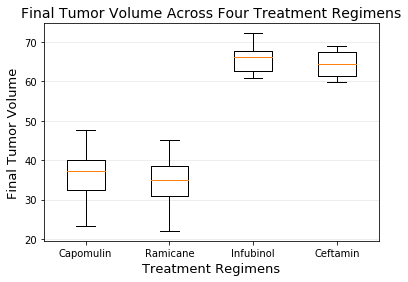

In [61]:
# Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens 
# and highlight any potential outliers in the plot by changing their color and style.

drugs =["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
data = [cap_final_tumor_vol_data, ram_final_tumor_vol_data, inf_final_tumor_vol_data, cef_final_tumor_vol_data]

fig1, ax1 = plt.subplots()
ax1.boxplot(data)
ax1.set_xticklabels(drugs)
ax1.set_title("Final Tumor Volume Across Four Treatment Regimens", fontsize=14)
ax1.set_ylabel("Final Tumor Volume", fontsize=13)
ax1.set_xlabel("Treatment Regimens", fontsize=13)
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=.5)
plt.show()

## Line and scatter plots

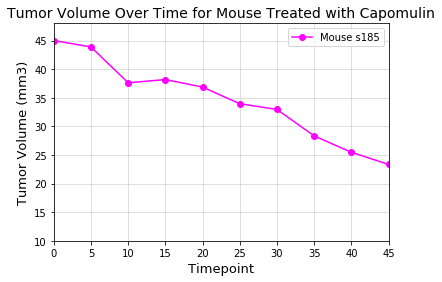

In [132]:
# Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin
s185_capomulin_data = mouse_treatment_data.loc[(mouse_treatment_data["Drug Regimen"] == "Capomulin")&
                                               (mouse_treatment_data["Mouse ID"] == "s185")].drop(columns=["Sex","Age_months","Weight (g)", "Metastatic Sites"])
#display(s185_capomulin_data)

x_axis = s185_capomulin_data["Timepoint"]
y_axis = s185_capomulin_data["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis, marker="o", color="fuchsia", label = "Mouse s185")
plt.xlim(0, 45, 5)
plt.ylim(10,max(y_axis)+3)
plt.xlabel("Timepoint", fontsize=13)
plt.ylabel("Tumor Volume (mm3)", fontsize=13)
plt.title("Tumor Volume Over Time for Mouse Treated with Capomulin", fontsize=14)
plt.legend(loc="best")
plt.grid(alpha=.5)
plt.show()

,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


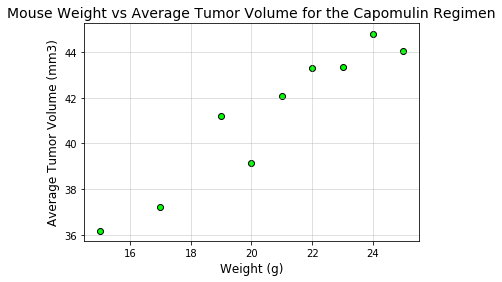

In [107]:
# Generate a Scatter Plot of Mouse Weight versus Average Tumor Volume for the Capomulin regimen

#Extract Capomulin data from larger dataframe
capomulin_data = mouse_treatment_data.loc[(mouse_treatment_data["Drug Regimen"] == "Capomulin")]
#display(capomulin_data)

# Group by Weight to calculate Average Tumor Volume by Weight
grouped_cap_data = capomulin_data.groupby(["Weight (g)"])
cap_avg_tumor_vol_by_weight = grouped_cap_data.mean().drop(columns=["Age_months", "Timepoint", 
                                                                    "Metastatic Sites"]).reset_index()
display(cap_avg_tumor_vol_by_weight)

# Plot data as a Scatter Plot
weight = cap_avg_tumor_vol_by_weight["Weight (g)"]
avg_tumor_vol = cap_avg_tumor_vol_by_weight["Tumor Volume (mm3)"]

plt.scatter(weight, avg_tumor_vol, marker="o", facecolors="lime", edgecolors="black")
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12)
plt.title("Mouse Weight vs Average Tumor Volume for the Capomulin Regimen", fontsize=14)
plt.grid(alpha=.5)
plt.show()


In [106]:
# Calculate the Correlation Coefficient for Mouse Weight and Average Tumor Volume for the Capomulin regimen
correlation = st.pearsonr(weight, avg_tumor_vol)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume is 0.95


The r-squared value is: 0.950524396185527


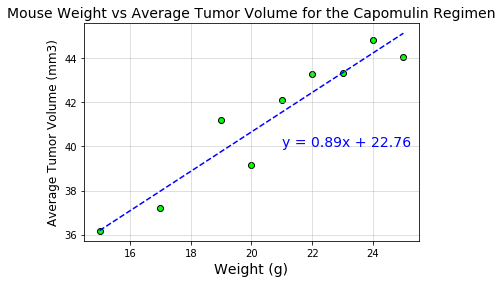

In [117]:
# Calculate the Linear Regression Model for Mouse Weight and Average Tumor Volume for the Capomulin regimen
x_values = weight
y_values = avg_tumor_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print R-Squared Value and Plot Linear Regression Equation and line on Scatter Plot
print(f"The r-squared value is: {rvalue}")
plt.scatter(x_values, y_values, marker="o", facecolors="lime", edgecolors="black")
plt.plot(x_values,regress_values,"b--")
plt.annotate(line_eq,(21,40),fontsize=14,color="blue")
plt.xlabel("Weight (g)", fontsize=14)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12)
plt.title("Mouse Weight vs Average Tumor Volume for the Capomulin Regimen", fontsize=14)
plt.grid(alpha=.5)
plt.show()